# 一般逆行列

一般逆行列に対していろいろ確認してみる．

- ライブラリを用いて得た一般逆行列が，特異値分解を利用して求めた結果と一致することを示す．

- $A$ の一般逆行列と連立方程式 $Ax=b$ との関係を確認する．

`numpy` の線形代数用のライブラリ `numpy.linalg` を用いる．（参考 https://numpy.org/doc/stable/reference/routines.linalg.html  ）

In [1]:
# 必要なライブラリの import
import numpy as np
nl = np.linalg

## 逆行列を求める

`np.linalg.inv` で簡単にできる．上で `nl = np.linalg` とエイリアスを設定しているので以下のようにできる．
逆行列が存在しない(行列が正則でない)場合はエラーになる．

以下において，行列 $A$ は正則(行列式が非ゼロ)だが， $B$ は正則でない(行列式が0)ので， $B$ の逆行列は存在しない．

In [2]:
# 行列を定義し，その逆行列を表示してみる
A = np.array([[2, 3], [1, 2]])
print('|A| = {0}\n'.format(nl.det(A)))
print('A =\n {0}\n'.format(A))
print('A^-1 = \n {0}\n'.format(nl.inv(A)))

print('AA^-1 = \n{0}'.format(np.dot(A, nl.inv(A))))

|A| = 1.0

A =
 [[2 3]
 [1 2]]

A^-1 = 
 [[ 2. -3.]
 [-1.  2.]]

AA^-1 = 
[[1. 0.]
 [0. 1.]]


In [3]:
B = np.array([[6,2],[3,1]])
print('|B| = {0}\n'.format(nl.det(B)))
print('B =\n {0}\n'.format(B))
print('B^-1 = \n {0}\n'.format(nl.inv(B))) # エラー発生

|B| = 0.0

B =
 [[6 2]
 [3 1]]



LinAlgError: Singular matrix

In [4]:
B

array([[6, 2],
       [3, 1]])

## 一般逆行列を求める

`nl.pinv` ( 'p' は 'pseudo' の頭文字 ) で一般逆行列の計算ができる．
上の非正則行列 $B$ の一般逆行列を求める．

In [5]:
print('B^- = \n {0}\n'.format(nl.pinv(B)))

B^- = 
 [[0.12 0.06]
 [0.04 0.02]]



In [6]:
np.dot(B, nl.pinv(B))

array([[0.8, 0.4],
       [0.4, 0.2]])

## 特異値分解との関係

$B = USV^T$ と特異値分解できるとき，$B$ の一般逆行列 $B^-$ は$B^- = VS^{-1}U^T$ と分解できる．

$S$ は特異値が並んだ行列となるので，$S^{-1}$ は非ゼロの特異値($S$ の非ゼロ要素)を逆数にした行列となる．

以下で，上の非正則行列 $B$ を特異値分解し，それを利用して一般化逆行列を構成する．

In [7]:
# SVDを行う
u, s, v = nl.svd(B)
print('Bの特異値 = {0}'.format(s))

Bの特異値 = [7.07106781e+00 1.47663827e-17]


特異値分解の結果より，2番目の特異値は非常に小さいので0としてよさそうである．

0とみなす特異値の閾値を `eps` として定義しておいて，それより大きい特異値のみ逆数をとることにし，それ以下のものは0にして非ゼロ特異値の逆数を並べた行列(非対角成分は0)を構成する．

In [8]:
eps = 1e-10 # 0とみなす特異値の閾値

# t <= eps なる特異値 t は0にし，そうでないものは逆数1/tをとる
s = [1/t * int(t > eps) for t in s]

# sを2次元ベクトルを2*2の対角行列にする
sigma = np.zeros((2,2))
for i in range(sigma.ndim):
    sigma[i][i] = s[i] # 対角成分のみ設定
print('S^-1 = \n{0}'.format(sigma))

S^-1 = 
[[0.14142136 0.        ]
 [0.         0.        ]]


In [9]:
# 特異値分解の結果から一般逆行列を構成する
Bp = np.dot(np.dot(v.T, sigma), u.T)
print('B^- = \n {0}\n'.format(Bp))

B^- = 
 [[0.12 0.06]
 [0.04 0.02]]



In [10]:
C = np.array([[2, 1, 0], [-1, 4, 1]])
print('C^- = \n{0}'.format(nl.pinv(C)))

D = np.array([[2, 1], [-1, -2], [0, 8]])
print('D^- = \n{0}'.format(nl.pinv(D)))

C^- = 
[[ 0.44186047 -0.10465116]
 [ 0.11627907  0.20930233]
 [-0.02325581  0.05813953]]
D^- = 
[[ 0.40729483 -0.18541033 -0.09726444]
 [-0.00911854 -0.01823708  0.12158055]]


上の結果より，特異値分解の結果から計算した$B$の一般逆行列が， `nl.pinv(B)` で計算したものと一致していることがわかる．

## 連立1次方程式との関係

### 1. 係数行列$A$ が正則の場合
$$
A = \left[
   \begin{array}{rrr}
      2 & 1 \\
      1 & 2
    \end{array}
\right]
$$

の場合，上で見たように $A$ は正則である．よって，$Ax = b$ の解は一意に定まる．
これは幾何学的には xy 平面上の2直線の交点がただ一つ定まることを意味する．

今回 $b = (1,1)$ として，連立1次方程式 $Ax = b$ を解く．

$A$ の逆行列は存在するので，それを両辺に左からかければ解が求まる．

その解を点でプロットし，2直線の交点になっていることを確かめる．

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
def plt_2lines(x, y1, y2, sol=None):
  # 描画用のスペースを定義
  fig, ax = plt.subplots(figsize=(8, 8))
  ax.set_xlabel('$x$')
  ax.set_ylabel('$y$')
  ax.plot(x, y1)
  ax.plot(x, y2)
  ax.grid(True)
  if sol is not None:
    ax.scatter(sol[0], sol[1], s=500, marker='.', c='r')
  plt.show()

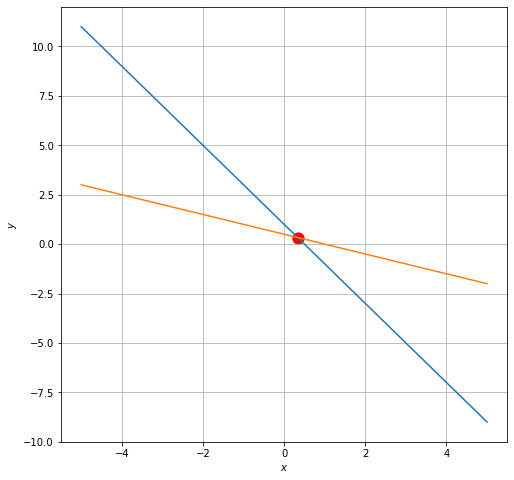

In [13]:
# Ax = b
A = np.array([[2, 1], [1, 2]])
b1 = np.array((1,1))
x = np.linspace(-5, 5, 100) # [-5,5]の範囲で100点等間隔にとる
sol1 = np.dot(nl.inv(A), b1)
# 方程式の表す直線の式
y11 = (-A[0][0] * x + b1[0]) / A[0][1]
y12 = (-A[1][0] * x + b1[1]) / A[1][1]
plt_2lines(x, y11, y12, sol1)

### 2. 係数行列$B$ が正則ではない場合
$$
B = \left[
   \begin{array}{rrr}
      1 & 1 \\
      2 & 2
    \end{array}
\right]
$$

の場合，上で見たように $B$ は正則ではない．よって，$Bx = b$ の解は一意に定まらない．

今回 $b = (3,6)$ として，連立1次方程式 $Bx = b$ を解くことを試みる．

まずは，この方程式の表す2直線を表示してみる．

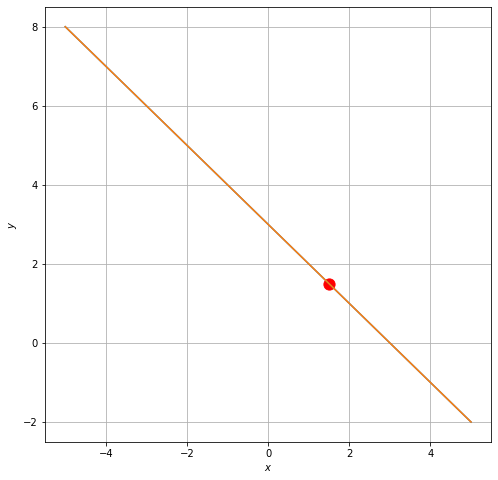

In [34]:
# Bx = b
B = np.array([[1, 1], [2, 2]])
b2 = np.array((3,6))
x = np.linspace(-5, 5, 100) # [-5,5]の範囲で100点等間隔にとる
sol2 = np.dot(nl.pinv(B), b2)

# 方程式の表す直線の式
y21 = (-B[0][0] * x + b2[0]) / B[0][1]
y22 = (-B[1][0] * x + b2[1]) / B[1][1]

plt_2lines(x, y21, y22, sol2)

上のように，2直線は平行なので解は存在しないことがわかる（不能）．

$B$ の一般逆行列 $B^-$ を用いて，$x = B^- b$ とすることで，'それらしい解' を計算することができる．

### 3. 多すぎる方程式

未知数2つに対して3つの方程式からなる連立方程式を考える．

係数行列を
$$
A = \left[
   \begin{array}{rrr}
      1 & 1 \\
      1 & -1 \\
      0 & 1
    \end{array}
\right]
$$

$b = (4,0,1)$ として， $Ax=b$ を考える． 

この方程式は不能(解なし)であるが，一般逆行列を利用することで 'それらしい解' を計算できる．

※ 'それらしい解' とは，最小二乗法の結果として得られる．

In [35]:
# Ax = b
C = np.array([[1, 1], [1, -1], [0, 1]])
b3 = np.array((4, 0, 1))
x = np.linspace(-5, 5, 100) # [-5,5]の範囲で100点等間隔にとる
sol3 = np.dot(nl.pinv(C), b3)

# 方程式の表す直線の式
y31 = (-C[0][0] * x + b3[0]) / C[0][1]
y32 = (-C[1][0] * x + b3[1]) / C[1][1]
y33 = (-C[2][0] * x + b3[2]) / C[2][1]

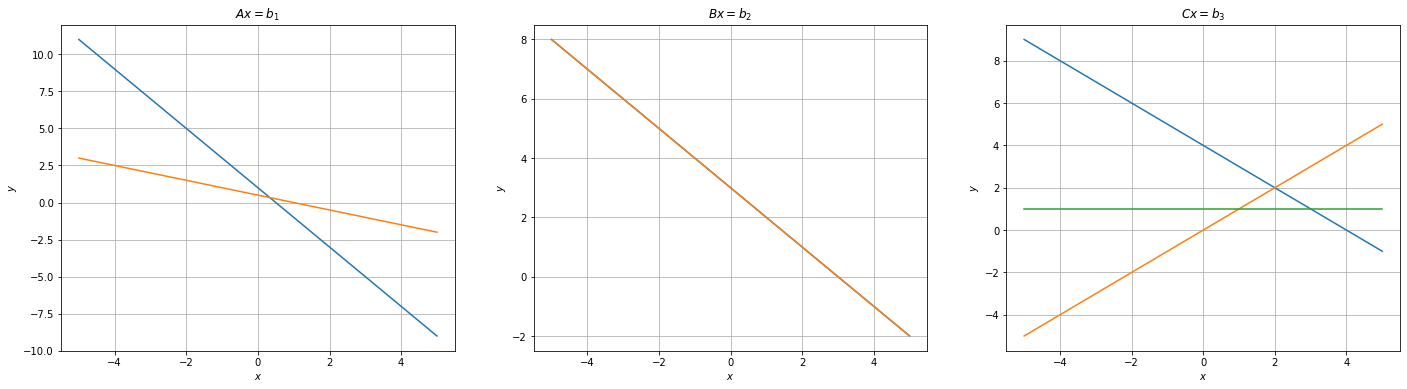

In [36]:
fig = plt.figure(figsize=(24,6))

ax1 = fig.add_subplot(1, 3, 1)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_title('$Ax=b_1$')
ax1.plot(x, y11)
ax1.plot(x, y12)
ax1.grid(True)

ax2 = fig.add_subplot(1, 3, 2)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_title('$Bx=b_2$')
ax2.plot(x, y21)
ax2.plot(x, y22)
ax2.grid(True)

ax3 = fig.add_subplot(1, 3, 3)
ax3.set_xlabel('$x$')
ax3.set_ylabel('$y$')
ax3.set_title('$Cx=b_3$')
ax3.plot(x, y31)
ax3.plot(x, y32)
ax3.plot(x, y33)
ax3.grid(True)

plt.show()

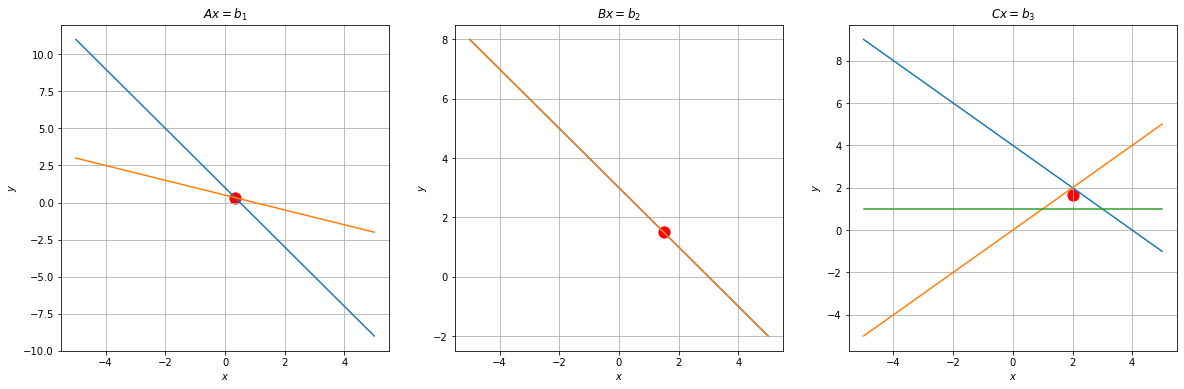

In [38]:
import matplotlib.patches as patches

fig = plt.figure(figsize=(20,6))


ax1 = fig.add_subplot(1, 3, 1)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_title('$Ax=b_1$')
ax1.plot(x, y11)
ax1.plot(x, y12)
ax1.scatter(sol1[0], sol1[1], s=500, marker='.', c='r')
ax1.grid(True)

ax2 = fig.add_subplot(1, 3, 2)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax2.set_title('$Bx=b_2$')
ax2.plot(x, y21)
ax2.plot(x, y22)
ax2.scatter(sol2[0], sol2[1], s=500, marker='.', c='r')
ax2.grid(True)

ax3 = fig.add_subplot(1, 3, 3)
ax3.set_xlabel('$x$')
ax3.set_ylabel('$y$')
ax3.set_title('$Cx=b_3$')
ax3.plot(x, y31)
ax3.plot(x, y32)
ax3.plot(x, y33)
ax3.scatter(sol3[0], sol3[1], s=500, marker='.', c='r')
ax3.grid(True)

plt.show()

In [39]:
sol1

array([0.33333333, 0.33333333])

In [40]:
sol2

array([1.5, 1.5])

In [41]:
sol3

array([2.        , 1.66666667])

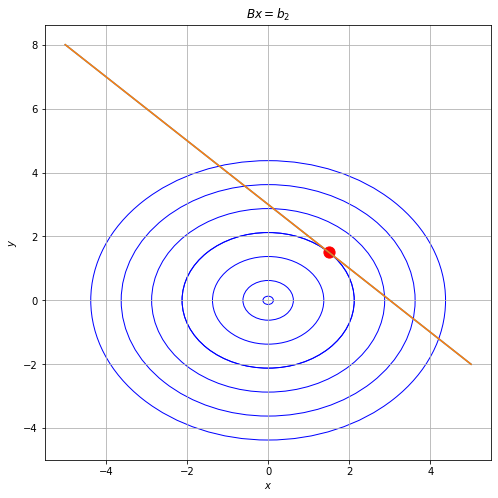

In [42]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('$Bx=b_2$')
ax.scatter(sol2[0], sol2[1], s=500, marker='.', c='r')
ax.plot(x, y21)
ax.plot(x, y22)
nrm = nl.norm(sol2)
for i in range(4):
  c1 = patches.Circle(xy=(0, 0), radius=nrm+0.75*i, fill=False, ec='b')
  c2 = patches.Circle(xy=(0, 0), radius=nrm-0.75*i, fill=False, ec='b')
  ax.add_patch(c1)
  ax.add_patch(c2)
ax.grid(True)
plt.show()

In [88]:
x = np.linspace(-5, 5, 300)
y = np.linspace(-5, 5, 300)
X, Y = np.meshgrid(x, y)
err = np.ndarray((300, 300))
for i in range(len(X)):
  for j in range(len(X)):
    err[i][j] = nl.norm(np.dot(C, np.array((X[i][j], Y[i][j])))-b3)

In [89]:
err.shape

(300, 300)

In [90]:
err.min()

0.8168481245637841

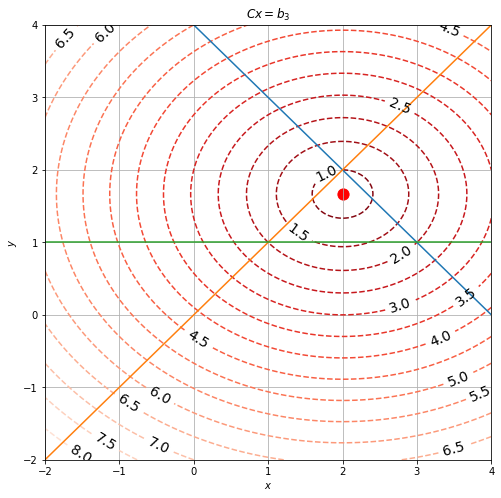

In [127]:
# Ax = b
C = np.array([[1, 1], [1, -1], [0, 1]])
b3 = np.array((4, 0, 1))
x = np.linspace(-2, 4, 300)
y = np.linspace(-2, 4, 300)
sol3 = np.dot(nl.pinv(C), b3)

# 方程式の表す直線の式
y31 = (-C[0][0] * x + b3[0]) / C[0][1]
y32 = (-C[1][0] * x + b3[1]) / C[1][1]
y33 = (-C[2][0] * x + b3[2]) / C[2][1]


# 等高線描画用
x = np.linspace(-2, 4, 300)
y = np.linspace(-2, 4, 300)
X, Y = np.meshgrid(x, y)
# ||Cx-b3||の値を格納する
err = np.ndarray((300, 300))
for i in range(len(X)):
  for j in range(len(X)):
    # ||Cx-b3||の計算
    err[i][j] = nl.norm(np.dot(C, np.array((X[i][j], Y[i][j]))) - b3)

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2, 4)
ax.set_ylim(-2, 4)
ax.set_title('$Cx=b_3$')
ax.scatter(sol3[0], sol3[1], s=500, marker='.', c='r')
ax.plot(x, y31)
ax.plot(x, y32)
ax.plot(x, y33)
cs = ax.contour(X, Y, err, cmap='Reds_r', linestyles='dashed', levels=15)
ax.clabel(cs, colors='black', fontsize=14)
ax.grid(True)
plt.show()

In [123]:
xx, yy = X[np.unravel_index(np.argmin(err), err.shape)], Y[np.unravel_index(np.argmin(err), err.shape)]